In [ ]:
# ref https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib as plt
import nltk
import pandas as pd

path = 'Data/1800FLOWERSCOMInc.txt'
path1 = 'Data/2UInc.txt'
path2 = 'Data/3DSystemsCorporation.txt'

file = open(path, "r") 
# print "Output of Readlines after appending"
text = file.readlines()
input_texts = text

In [26]:
# text

In [27]:
split_text = text[0].split(".")
# TODO Determine Best way to split

In [28]:
split_text

['[1] "Item 1A',
 ' Risk Factors',
 ' Cautionary Statements Under the Private Securities Litigation Reform Act of 1995',
 ' Our disclosures and analysis in this Form 10-K contain some forward-looking statements that set forth anticipated results based on management’s plans and assumptions',
 ' From time to time, we also provide forward-looking statements in other statements we release to the public as well as oral forward-looking statements',
 ' Such statements give our current expectations or forecasts of future events; they do not relate strictly to historical or current facts',
 ' We have tried, wherever possible, to identify such statements by using words such as “anticipate,” “estimate,” “expect,” “project,” “intend,” “plan,” “believe” and similar expressions in connection with any discussion of future operating or financial performance',
 ' In particular, these include statements relating to future actions; the effectiveness of our marketing programs; the performance of our exist

In [29]:
vectorizer = TfidfVectorizer(stop_words='english')
# TODO: Custom stopwords, 1-800-flowers returned in multiple slices/formats-> Replace with [name]?
X = vectorizer.fit_transform(split_text)
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform
# 

In [30]:
X

<337x1161 sparse matrix of type '<class 'numpy.float64'>'
	with 3211 stored elements in Compressed Sparse Row format>

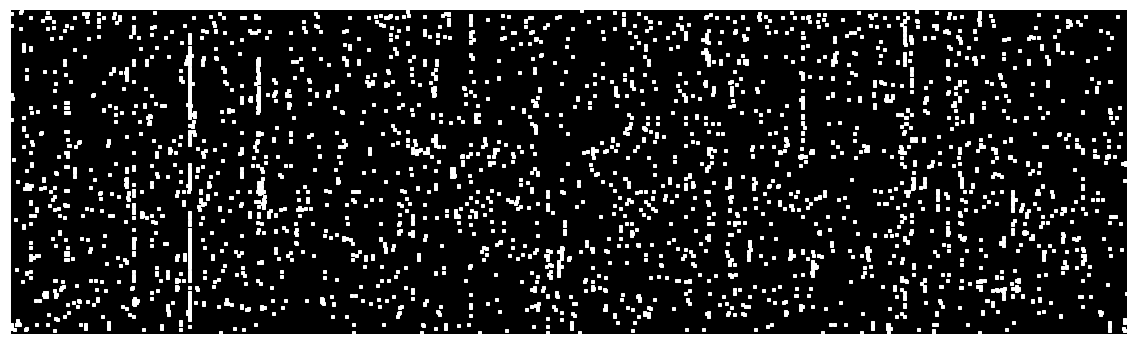

In [31]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
# https://stackoverflow.com/questions/22961541/python-matplotlib-plot-sparse-matrix-pattern
# this is a randoom sparce matrix , but we can viz ours tomorrow
def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111, facecolor ='black')
    ax.plot(m.col, m.row, 's', color='white', ms=3)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax



ax = plot_coo_matrix(X)
ax.figure.show()
# plt.spy(X)

In [34]:

# truek = PLEASE_FIND_ME
truek = 25
model = KMeans(n_clusters=truek, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=25, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [36]:
nclosest_words_to_show = 5
for i in range(truek):
 print('Cluster %d:' % i),
 for ind in order_centroids[i, :nclosest_words_to_show]:
     print(' %s' % terms[ind])

Cluster 0:
 regions
 affecting
 availability
 affected
 factors
Cluster 1:
 company
 results
 customers
 products
 25cf
Cluster 2:
 flowers
 limited
 rise
 sale
 gross
Cluster 3:
 employees
 outsourced
 permanent
 temporary
 staff
Cluster 4:
 gift
 plant
 basket
 gourmet
 food
Cluster 5:
 card
 cards
 debit
 credit
 charged
Cluster 6:
 department
 questions
 problems
 depends
 respond
Cluster 7:
 analysis
 forth
 set
 based
 disclosures
Cluster 8:
 liability
 product
 claims
 costs
 increased
Cluster 9:
 contents
 table
 years
 existing
 event
Cluster 10:
 credits
 satisfied
 refunds
 issue
 purchase
Cluster 11:
 costly
 actions
 government
 breach
 expose
Cluster 12:
 result
 oversupply
 write
 offs
 basis
Cluster 13:
 expands
 offerings
 importance
 believes
 recognition
Cluster 14:
 com
 damaged
 brands
 expand
 evolving
Cluster 15:
 card
 fraud
 debit
 gift
 credit
Cluster 16:
 important
 include
 factors
 years
 excess
Cluster 17:
 disrupt
 infringement
 conduct
 successful
 claim

In [37]:
print('\n')
print('Prediction')
X = vectorizer.transform(['Market outlook on coffee looks promising'])
predicted = model.predict(X)
print(predicted)




Prediction
[1]


In [38]:
# HOW DO WE FIND OUT WHAT #7 meams?, 1Closest_word to cluster definitely isn't it
for i in range(truek):
 print('Cluster %d:' % i),
 for ind in order_centroids[i, :1]:
     print(' %s' % terms[ind])

Cluster 0:
 regions
Cluster 1:
 company
Cluster 2:
 flowers
Cluster 3:
 employees
Cluster 4:
 gift
Cluster 5:
 card
Cluster 6:
 department
Cluster 7:
 analysis
Cluster 8:
 liability
Cluster 9:
 contents
Cluster 10:
 credits
Cluster 11:
 costly
Cluster 12:
 result
Cluster 13:
 expands
Cluster 14:
 com
Cluster 15:
 card
Cluster 16:
 important
Cluster 17:
 disrupt
Cluster 18:
 25cf
Cluster 19:
 secret
Cluster 20:
 800
Cluster 21:
 1995
Cluster 22:
 subjects
Cluster 23:
 sublease
Cluster 24:
 temperatures


In [39]:
# using joblib to pickle model
from sklearn.externals import joblib
joblib.dump(model,  'doc_cluster.pkl')
model = joblib.load('doc_cluster.pkl')

In [163]:
## TF-IDF analysis 
from nltk.corpus import stopwords

words = text[0].split(" ")
wordset = []
stopWords = set(stopwords.words('english'))
print(stopWords)
for w in words:
#     wordset.append(w)

    if w not in stopWords:
        wordset.append(w)
wordSet

{'him', 'am', "couldn't", 'having', 'who', 'that', 'too', 'wasn', 'to', "you're", 'her', 'has', 'shouldn', 'mightn', 'does', 'theirs', 'had', 'here', 'don', 'hadn', "weren't", 'a', 'be', 'being', 'when', 'are', 'my', 'is', 'all', 'haven', 'not', 'wouldn', 'won', 'only', 'where', 'your', 'while', 'mustn', 'out', 'herself', 'again', 'doing', 'same', 'did', 'me', 'd', 'couldn', 'at', "aren't", 've', 'into', 'what', 'no', "it's", 'doesn', 'few', 'nor', "hadn't", 'needn', 'aren', 'were', 'o', 'he', 'we', 's', 'above', 'or', "don't", "should've", 'his', 'isn', "she's", 'so', 'its', 'up', 'this', 'do', 'y', 'on', 'once', 'those', "doesn't", 't', 'why', 'very', 'ain', 'yourselves', 'there', "wouldn't", 'can', "haven't", "you'll", 'and', 'further', 'which', 'with', 'in', 'just', "that'll", 'yours', 'during', 'll', 'itself', 'such', 'through', "needn't", 'the', 'after', 'these', 'before', 'if', 'hers', 'have', 'will', 're', 'themselves', 'until', "you'd", 'whom', 'ma', "didn't", 'between', 'myse

{'',
 'held',
 'knew',
 'selection..',
 'us',
 'decrease..',
 'all.',
 'Inc.',
 'also',
 'manufacture',
 'temporary',
 'store,',
 'effectively,',
 'cover',
 'conditions',
 'making',
 'sentiment',
 'clean-up',
 'part',
 'individual',
 'proceedings',
 'market',
 'www.1800flowers.com.',
 'disaster,',
 'order',
 'farming',
 'perishable',
 'laws',
 'tax,',
 'stored',
 'This',
 'procure',
 'default',
 'substantially.',
 'category,',
 'aggregate,',
 '\\t\\t\\tseasonality;',
 'governmental',
 'shipping',
 'disclose',
 'procedures',
 'available,',
 'malicious',
 'programming',
 'otherwise.',
 'numbers.',
 'misdials,',
 'sensitive',
 'successful,',
 'find',
 'regulatory',
 'party',
 'Moreover,',
 'justify',
 'Supreme',
 'replace',
 'calendar',
 'function',
 'shortfall',
 'if',
 'cookie,',
 'reasonably',
 'addition',
 'experience',
 'revenue.',
 'confidence.',
 'statements',
 'income',
 'food',
 'conduct',
 'Harry',
 'investors,',
 'stoppages;',
 'expectations.',
 'activities',
 'deteriorate',
 '

In [164]:
wordDict = dict.fromkeys(wordSet, 0) 
for word in words:
    wordDict[word]+=1
    
pd.DataFrame([wordDict])

,,"""Item",&,(1-800-356-9377)..,(The,"(\""SEC\"").",(e.g.,(http://www.sec.gov),(i),(ii),...,"“1-800-Flowers.com”,",“1-800-Flowers”,“800-Flowers”.,"“anticipate,”",“believe”,"“estimate,”","“expect,”","“intend,”","“plan,”","“project,”"
0,15,1,2,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [165]:
def computeTF(wordDict, split_words):
    tfDict = {}
    word_count = len(split_words)
    for word, count in wordDict.items():
        tfDict[word] = count/float(word_count)
    return tfDict

In [166]:
c = computeTF(wordDict, words)

In [167]:
term_frequency

{'': 0.002436251421146662,
 'held': 0.00016241676140977748,
 'knew': 0.00016241676140977748,
 'selection..': 0.00016241676140977748,
 'us': 0.0006496670456391099,
 'decrease..': 0.00016241676140977748,
 'all.': 0.00016241676140977748,
 'Inc.': 0.00016241676140977748,
 'also': 0.001624167614097775,
 'manufacture': 0.00032483352281955497,
 'temporary': 0.0008120838070488875,
 'store,': 0.00016241676140977748,
 'effectively,': 0.00016241676140977748,
 'cover': 0.00016241676140977748,
 'conditions': 0.0006496670456391099,
 'making': 0.00016241676140977748,
 'sentiment': 0.00016241676140977748,
 'clean-up': 0.00032483352281955497,
 'part': 0.00032483352281955497,
 'individual': 0.00016241676140977748,
 'proceedings': 0.00032483352281955497,
 'market': 0.0011369173298684423,
 'www.1800flowers.com.': 0.00016241676140977748,
 'disaster,': 0.00016241676140977748,
 'order': 0.00032483352281955497,
 'farming': 0.00048725028422933245,
 'perishable': 0.00016241676140977748,
 'laws': 0.0017865843755

In [168]:
def computeIDF(docList):
    import math
    idfDict = {}
    N = len(docList)
    print(N)
    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for doc in docList:
        for word, val in doc.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log10(N / float(val))
        
    return idfDict

In [174]:
idfs = computeIDF([term_frequency])

# This isnt working? Maybe only one doc?
idfs

1


{'': 0.0,
 'held': 0.0,
 'knew': 0.0,
 'selection..': 0.0,
 'us': 0.0,
 'decrease..': 0.0,
 'all.': 0.0,
 'Inc.': 0.0,
 'also': 0.0,
 'manufacture': 0.0,
 'temporary': 0.0,
 'store,': 0.0,
 'effectively,': 0.0,
 'cover': 0.0,
 'conditions': 0.0,
 'making': 0.0,
 'sentiment': 0.0,
 'clean-up': 0.0,
 'part': 0.0,
 'individual': 0.0,
 'proceedings': 0.0,
 'market': 0.0,
 'www.1800flowers.com.': 0.0,
 'disaster,': 0.0,
 'order': 0.0,
 'farming': 0.0,
 'perishable': 0.0,
 'laws': 0.0,
 'tax,': 0.0,
 'stored': 0.0,
 'This': 0.0,
 'procure': 0.0,
 'default': 0.0,
 'substantially.': 0.0,
 'category,': 0.0,
 'aggregate,': 0.0,
 '\\t\\t\\tseasonality;': 0.0,
 'governmental': 0.0,
 'shipping': 0.0,
 'disclose': 0.0,
 'procedures': 0.0,
 'available,': 0.0,
 'malicious': 0.0,
 'programming': 0.0,
 'otherwise.': 0.0,
 'numbers.': 0.0,
 'misdials,': 0.0,
 'sensitive': 0.0,
 'successful,': 0.0,
 'find': 0.0,
 'regulatory': 0.0,
 'party': 0.0,
 'Moreover,': 0.0,
 'justify': 0.0,
 'Supreme': 0.0,
 'repl

In [175]:
def computeTFIDF(term_frequency, idfs):
    tfidf = {}
    for word, val in term_frequency.items():
        tfidf[word] = val*idfs[word]
    return tfidf

In [176]:
tfidfBow = computeTFIDF(term_frequency, idfs)


In [177]:
tfidfBow


{'': 0.0,
 'held': 0.0,
 'knew': 0.0,
 'selection..': 0.0,
 'us': 0.0,
 'decrease..': 0.0,
 'all.': 0.0,
 'Inc.': 0.0,
 'also': 0.0,
 'manufacture': 0.0,
 'temporary': 0.0,
 'store,': 0.0,
 'effectively,': 0.0,
 'cover': 0.0,
 'conditions': 0.0,
 'making': 0.0,
 'sentiment': 0.0,
 'clean-up': 0.0,
 'part': 0.0,
 'individual': 0.0,
 'proceedings': 0.0,
 'market': 0.0,
 'www.1800flowers.com.': 0.0,
 'disaster,': 0.0,
 'order': 0.0,
 'farming': 0.0,
 'perishable': 0.0,
 'laws': 0.0,
 'tax,': 0.0,
 'stored': 0.0,
 'This': 0.0,
 'procure': 0.0,
 'default': 0.0,
 'substantially.': 0.0,
 'category,': 0.0,
 'aggregate,': 0.0,
 '\\t\\t\\tseasonality;': 0.0,
 'governmental': 0.0,
 'shipping': 0.0,
 'disclose': 0.0,
 'procedures': 0.0,
 'available,': 0.0,
 'malicious': 0.0,
 'programming': 0.0,
 'otherwise.': 0.0,
 'numbers.': 0.0,
 'misdials,': 0.0,
 'sensitive': 0.0,
 'successful,': 0.0,
 'find': 0.0,
 'regulatory': 0.0,
 'party': 0.0,
 'Moreover,': 0.0,
 'justify': 0.0,
 'Supreme': 0.0,
 'repl

In [186]:
import collections
collections.Counter(tfidfBow).most_common(30)


[('', 0.0),
 ('held', 0.0),
 ('knew', 0.0),
 ('selection..', 0.0),
 ('us', 0.0),
 ('decrease..', 0.0),
 ('all.', 0.0),
 ('Inc.', 0.0),
 ('also', 0.0),
 ('manufacture', 0.0),
 ('temporary', 0.0),
 ('store,', 0.0),
 ('effectively,', 0.0),
 ('cover', 0.0),
 ('conditions', 0.0),
 ('making', 0.0),
 ('sentiment', 0.0),
 ('clean-up', 0.0),
 ('part', 0.0),
 ('individual', 0.0),
 ('proceedings', 0.0),
 ('market', 0.0),
 ('www.1800flowers.com.', 0.0),
 ('disaster,', 0.0),
 ('order', 0.0),
 ('farming', 0.0),
 ('perishable', 0.0),
 ('laws', 0.0),
 ('tax,', 0.0),
 ('stored', 0.0)]

In [187]:
collections.Counter(term_frequency).most_common(30)



[('the', 0.05018677927562124),
 ('and', 0.03865518921552704),
 ('to', 0.03475718694169238),
 ('of', 0.031184018190677277),
 ('or', 0.021763846028910183),
 ('may', 0.01932759460776352),
 ('in', 0.016566509663797305),
 ('its', 0.016566509663797305),
 ('Company’s', 0.014130258242650642),
 ('Company', 0.013967841481240865),
 ('a', 0.010719506253045314),
 ('our', 0.010557089491635537),
 ('The', 0.009095338638947539),
 ('could', 0.008932921877537761),
 ('on', 0.007958421309079098),
 ('be', 0.007471171024849764),
 ('not', 0.007471171024849764),
 ('these', 0.006009420172161767),
 ('with', 0.006009420172161767),
 ('customers', 0.00584700341075199),
 ('as', 0.0055221698879324346),
 ('are', 0.005359753126522657),
 ('results', 0.005359753126522657),
 ('If', 0.005034919603703102),
 ('which', 0.004547669319473769),
 ('it', 0.004547669319473769),
 ('that', 0.004385252558063992),
 ('other', 0.004385252558063992),
 ('\\t\\t\\t', 0.004222835796654215),
 ('<U+25CF>', 0.004222835796654215)]

In [202]:
# Latent Dirichlet Allocation
# Ref http://brandonrose.org/clustering
# LDA is a probabilistic topic model that assumes documents
# are a mixture of topics and that each word in the document is attributable to the document's topics.
from nltk.stem.snowball import SnowballStemmer
import re
stemmer = SnowballStemmer("english")
import nltk
nltk.download('stopwords')
 
stopwords = nltk.corpus.stopwords.words('english')

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns
from gensim import corpora, models, similarities 

#remove proper names0
%time preprocess = [strip_proppers(doc) for doc in input_texts]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]
# print(texts)
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)
# print(dictionary)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
# dictionary.filter_extremes(no_below=1, no_above=0.8)  THIS FILTERS EVERYTHING OUT
# print(dictionary)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]
# print(corpus)
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xanen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Wall time: 70.5 ms
Wall time: 111 ms
Wall time: 8.98 ms
Wall time: 561 ms


In [203]:
lda.show_topics()


[(0,
  '0.034*"may" + 0.020*"custom" + 0.016*"result" + 0.016*"could" + 0.014*"product" + 0.012*"busi" + 0.011*"oper" + 0.008*"\\t\\t\\t" + 0.008*"system" + 0.007*"number"'),
 (1,
  '0.001*"may" + 0.001*"fragment" + 0.001*"free" + 0.001*"forth" + 0.001*"forward" + 0.001*"scenario" + 0.001*"fourth" + 0.001*"forese" + 0.001*"function" + 0.001*"frost"'),
 (2,
  '0.001*"may" + 0.001*"custom" + 0.001*"result" + 0.001*"product" + 0.001*"could" + 0.001*"busi" + 0.001*"net" + 0.001*"fact" + 0.001*"extens" + 0.001*"propos"'),
 (3,
  '0.001*"may" + 0.001*"short" + 0.001*"execut" + 0.001*"shortag" + 0.001*"exit" + 0.001*"procur" + 0.001*"expans" + 0.001*"expenditur" + 0.001*"shipment" + 0.001*"events.."'),
 (4,
  '0.001*"may" + 0.001*"fourth" + 0.001*"scenario" + 0.001*"search" + 0.001*"forth" + 0.001*"forward" + 0.001*"scope" + 0.001*"forecast" + 0.001*"frost" + 0.001*"free"')]

In [184]:
topics_matrix = lda.show_topics(formatted=False, num_words=15)
topics_matrix = np.array(topics_matrix)

topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word[0]) for word in i])
    print()

['may', 'forecast', 'search', 'frost', 'robust', 'free', 'sabotag', 'fragment', 'fourth', 'forward', 'forth', 'scenario', 'forese', 'scope', 'fungi']

['may', 'custom', 'forecast', 'second', 'free', 'sabotag', 'fragment', 'fourth', 'scenario', 'forward', 'forth', 'scope', 'forese', 'search', 'robust']

['may', 'search', 'forc', 'robust', 'frost', 'free', 'sabotag', 'fragment', 'fourth', 'scenario', 'forward', 'forth', 'scope', 'forese', 'fungi']

['may', 'forese', 'forecast', 'fungi', 'function', 'frost', 'robust', 'free', 'sabotag', 'fragment', 'fourth', 'forward', 'forth', 'scenario', 'gain']

['may', 'custom', 'result', 'could', 'product', 'busi', 'oper', '\\t\\t\\t', 'system', 'number', 'futur', 'parti', 'servic', 'signific', 'use']



In [207]:
# print(corpus)
lsi = models.lsimodel.LsiModel(corpus, num_topics=5, id2word=dictionary, chunksize=10000)
topics_matrix = lsi.show_topics(formatted=False, num_words=15)
topics_matrix = np.array(topics_matrix)
topic_words = topics_matrix[:,1]
for i in topic_words:
    print([str(word[0]) for word in i])
    print()

['may', 'custom', 'could', 'result', 'product', 'busi', 'oper', '\\t\\t\\t', 'system', 'number', 'parti', 'signific', 'futur', 'servic', 'use']

